In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
dfx=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')

In [143]:
dfx.head()
#dfy.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [144]:
df_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [145]:
dfx.values.shape

(1600, 6)

In [146]:
x=dfx.values
X=x[:,:-1]
Y=x[:,-1]
#X_test=df_test.values
#X_test=X_test[:,1]



# Normalise
X=(X-X.mean())/X.std()
X_test=(X_test-X_test.mean())/X_test.std()

In [147]:
X_test[:,1]

IndexError: too many indices for array

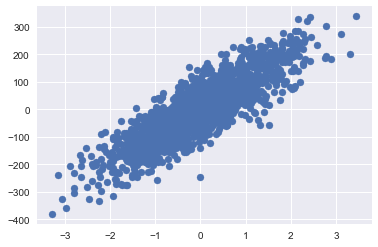

In [148]:
plt.scatter(X[:,1],Y)

In [149]:
# we are going to use the second feature as it is the
X=X[:,1]

In [150]:
X=X.reshape((-1,1))
Y=Y.reshape((-1,1))

In [151]:
# Inserting dummy variable
ones=np.ones((X.shape[0],1))
X=np.hstack((X,ones))
print(X.shape)
print(X[:4,])

(1600, 2)
[[-0.92093003  1.        ]
 [-0.16864243  1.        ]
 [ 0.15168305  1.        ]
 [ 0.16198536  1.        ]]


In [152]:
# closed form algorithm
def predictions(X,theta):
    return np.dot(X,theta)

def getTheta_closedForm(X,Y):
    Y=np.mat(Y)
    firstPart=np.dot(X.T,X)
    secondPart=np.dot(X.T,Y)
    # using the linear algebra psudo inverse method
    theta=np.linalg.pinv(firstPart)*secondPart
    return theta

In [153]:
theta=getTheta_closedForm(X,Y)

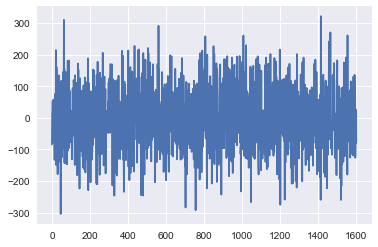

In [154]:
#Y.shape,X.shape
predictions(X,theta)
plt.plot(predictions(X,theta))

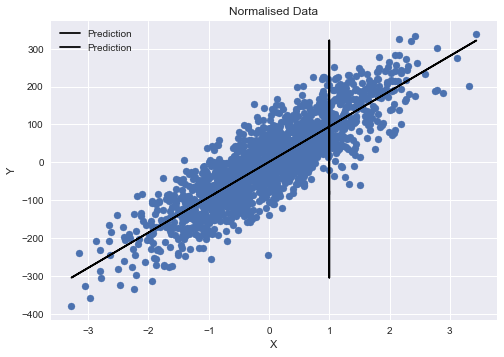

In [155]:
#plt.figure()
plt.style.use('seaborn')
plt.scatter(X[:,0],Y)
plt.plot(X,np.array(predictions(X,theta)),c='Black',label='Prediction')
plt.legend()
plt.title("Normalised Data")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [156]:
Y_=predictions(X_test,theta)

ValueError: shapes (400,) and (2,1) not aligned: 400 (dim 0) != 2 (dim 0)

In [157]:
def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score=(1 - num/denom)
    return score*100

In [158]:
r2_score(Y,np.array(Y_))

73.1633368433276

In [159]:
Y_

matrix([[-84.78362096],
        [-14.66449353],
        [ 15.19236299],
        ...,
        [-80.4828427 ],
        [  2.40947887],
        [-75.86808958]])

In [160]:
df=pd.DataFrame(data=np.array(Y_),columns=['target'])
df.to_csv('y_predictions.csv',index=True)

In [165]:
X_test[:,]

array([ 2.04744832e+00,  9.46769283e-01,  9.56380732e-01,  5.46512461e-01,
       -8.04485663e-01, -2.58073527e-01, -1.03325199e+00,  1.21004688e+00,
        1.48747137e+00,  1.17235381e+00, -3.09282096e-01,  2.52965364e-01,
       -3.65429942e-01,  9.23077992e-01, -5.79914033e-02,  1.17136647e-01,
       -2.05580508e+00,  2.15429097e-01,  8.15730127e-01,  7.42623288e-01,
        6.55982934e-01, -9.68810115e-01, -7.06417333e-01, -2.31774217e-01,
       -3.59426029e-01,  4.24851535e-01, -2.25087083e-01,  9.13124208e-01,
        6.24953055e-03, -4.84451825e-01,  9.48127482e-01, -1.02379938e+00,
        1.48615746e+00, -9.20776091e-01, -2.36145521e+00,  5.18691256e-01,
       -1.95513605e-01,  8.59004252e-01, -2.85468406e+00,  9.32913036e-01,
       -1.06470795e+00, -1.65857827e+00, -1.69779360e+00,  7.79615993e-01,
       -2.07140169e+00, -4.61413817e-02, -6.26391674e-01, -7.29939758e-01,
       -6.44689080e-01, -3.40843749e-01,  8.17308374e-01, -2.92074643e+00,
        3.08688201e-01, -

In [31]:
x=dfx.values
X=x[:,:-1]
Y=x[:,-1]

In [32]:
X.shape

(1600, 5)

In [33]:
Y.shape

(1600,)

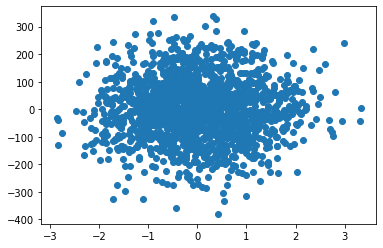

In [27]:
plt.scatter(X[:,4],Y)

In [34]:
# make a numpy arreay of ones
ones=np.ones((x.shape[0],1))
#print(ones)
X=np.hstack((ones,X))
print(X.shape)

(1600, 6)


In [35]:
X=(X-X.mean())/X.std()

In [42]:
X_=pd.read_csv('Test.csv')
X_=X_.values
ones=np.ones((X_.shape[0],1))
#print(ones)
X_=np.hstack((ones,X_))
X_=(X_-X_.mean())/X_.std()

In [46]:
m=X_.shape[0]
y_=[]
for i in range(m):
    pred=hypothesis(X_[i],theta)
    y_.append(pred)
y_ =np.array(y_)

In [44]:
def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score=(1 - num/denom)
    return score*100

In [ ]:
r2_score(y,y_)

In [ ]:
df=pd.DataFrame(data=y_test,columns=['y'])
df.to_csv('y_predictions.csv',index=False)